# Fraud Discovery data

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
plt.style.use('ggplot')


In [67]:
data = pd.read_csv('Fraud_Data.csv')
data.drop(['#'],inplace=True,axis=1)

data['Claim Amount']=data['Claim Amount'].str.replace('$','')
data['Claim Amount']=data['Claim Amount'].apply(pd.to_numeric)
data.head()

,Fraud Instance,Damaged Item,Item Not Avaiable,Item Not In Stock,Product Care Plan,Claim Amount,Registered Online,Age Group,Marital Status,Owns a Vehicle,Accomodation Type,Height (cms)
0,0,1,0,1,0,89,1,29,In-Relationship,1,Owns a house,155
1,0,0,0,1,1,290,0,33,Married,1,Staying with Family,178
2,0,1,0,0,1,67,0,39,Married,1,Staying with Family,156
3,1,0,0,1,0,350,0,49,In-Relationship,1,Rented,187
4,0,1,0,0,1,297,0,37,In-Relationship,1,Staying with Family,184


In [68]:
features_raw=data.drop(['Fraud Instance'],axis=1)
label=data['Fraud Instance']
features_raw.head()

,Damaged Item,Item Not Avaiable,Item Not In Stock,Product Care Plan,Claim Amount,Registered Online,Age Group,Marital Status,Owns a Vehicle,Accomodation Type,Height (cms)
0,1,0,1,0,89,1,29,In-Relationship,1,Owns a house,155
1,0,0,1,1,290,0,33,Married,1,Staying with Family,178
2,1,0,0,1,67,0,39,Married,1,Staying with Family,156
3,0,0,1,0,350,0,49,In-Relationship,1,Rented,187
4,1,0,0,1,297,0,37,In-Relationship,1,Staying with Family,184


## Normalize data

In [69]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['Claim Amount','Age Group','Height (cms)']
features_raw[numerical] = scaler.fit_transform(data[numerical])

display(features_raw.head(n = 1))

,Damaged Item,Item Not Avaiable,Item Not In Stock,Product Care Plan,Claim Amount,Registered Online,Age Group,Marital Status,Owns a Vehicle,Accomodation Type,Height (cms)
0,1,0,1,0,0.16875,1,0.297297,In-Relationship,1,Owns a house,0.125


## check skew

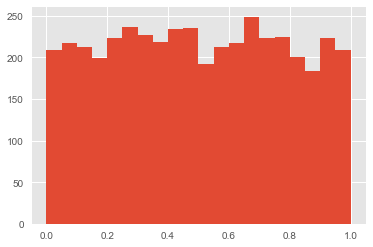

In [71]:
plt.hist(features_raw['Claim Amount'],bins=20)
plt.show()

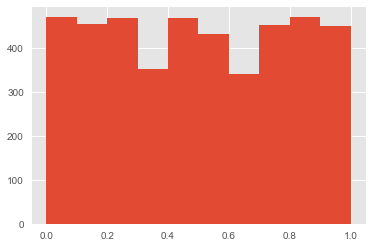

In [74]:
plt.hist(features_raw['Age Group'])
plt.show()

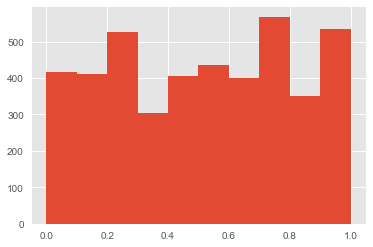

In [75]:
plt.hist(features_raw['Height (cms)'])
plt.show()

Things are either binary or uniformly distributed. No skew, no need to correct for it.

## one hot encode

In [77]:
features = pd.get_dummies(features_raw)

# TODO: Encode the 'income_raw' data to numerical values
#print(income.head(n=10))
# Print the number of features after one-hot encoding
encoded = list(features.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))
print (encoded)

15 total features after one-hot encoding.
['Damaged Item', 'Item Not Avaiable', 'Item Not In Stock', 'Product Care Plan', 'Claim Amount', 'Registered Online', 'Age Group', 'Owns a Vehicle', 'Height (cms)', 'Marital Status_In-Relationship', 'Marital Status_Married', 'Marital Status_Unmarried,', 'Accomodation Type_Owns a house', 'Accomodation Type_Rented', 'Accomodation Type_Staying with Family']


## Split into test/train

In [79]:
from sklearn.model_selection import train_test_split #sklearn 0.18.1 and up
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size = 0.2, random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3479 samples.
Testing set has 870 samples.


## train a decision tree classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
clf = DecisionTreeClassifier(random_state=2)
clf.fit(X_train,y_train)

predictions_test = clf.predict(X_test)
predictions_train = clf.predict(X_train[:300])

results = {}

results['acc_train'] = accuracy_score(y_train[:300],predictions_train)

# TODO: Compute accuracy on test set
results['acc_test'] = accuracy_score(y_test,predictions_test)

# TODO: Compute F-score on the the first 300 training samples
results['f_train'] = f1_score(y_train[:300],predictions_train)

# TODO: Compute F-score on the test set
results['f_test'] = f1_score(y_test,predictions_test)

In [83]:
print(results)

{'acc_train': 1.0, 'acc_test': 1.0, 'f_train': 1.0, 'f_test': 1.0}


## look at which features are important to the classification

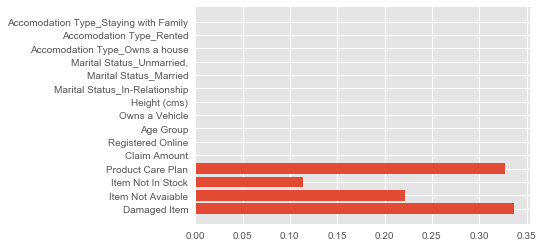

In [90]:
y_pos=np.arange(len(clf.feature_importances_))

plt.barh(y_pos,clf.feature_importances_)
plt.yticks(y_pos,features.columns)
plt.show()

In [96]:
clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 2,
 'splitter': 'best'}

## create a visual representation of the tree

In [178]:
from sklearn import tree
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=features.columns,class_names=['Not Fraud','Fraudulent']) 
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("fraud_decisiontree.pdf") 

True